## This notebook shows how you can the Vaex python library to analyze millions of rows of data. This particular dataset was 4 gb in size and had 42.5 million rows of data.

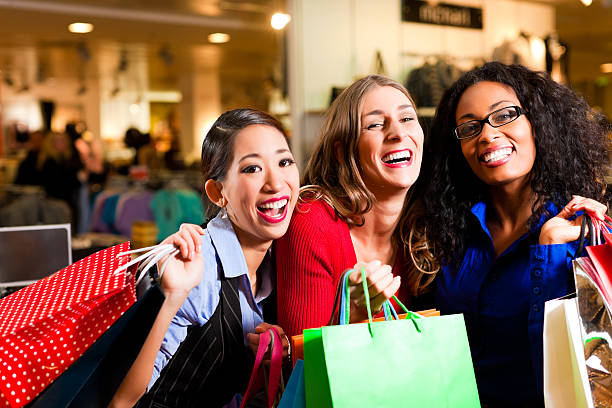

In [84]:
from IPython.display import Image
Image(filename='shoppers.jpg', width=500, height=200)

In [14]:
## Import Necessary Modules
import pandas as pd
import vaex
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Connecting to a 4 gb csv file.
file_path = '2019-Oct.csv'

In [3]:
# Convert csv to a hdf5 file.
vaex_df = vaex.from_csv(file_path, convert=True, chunk_size=5_000_000)

In [5]:
df = vaex.open('/Users/Yash/Desktop/Data/Sales/2019-Oct.csv.hdf5')

In [6]:
# 42.5 million rows
# 9 columns
df.shape

(42448764, 9)

In [7]:
df.head()

#,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,--,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.2,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,--,543.1,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,--,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,--,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


In [10]:
# Take-away 1: Here we can see that we missing values for the category_code and brand columns. 
# Take-away 2: We can see that the average price customers are paying is $290.32.
# Take-away 3: Some customers aren't paying anything. These could either be items that were given away for free or 
# someone could have entered that in if they didn't know the price of the item. We can see this from the fact that some items 
# in brand and category_code have (--). 
df.describe()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
data_type,string,string,int64,int64,string,string,float64,int64,string
count,42448764,42448764,42448764,42448764,28933155,36331684,42448764,42448764,42448762
NA,0,0,0,0,13515609,6117080,0,0,2
mean,--,--,10549932.375842676,2.057404237883356e+18,--,--,290.3236606850818,533537147.50816846,--
std,--,--,1.18819e+07,1.84393e+16,--,--,358.269,1.85237e+07,--
min,--,--,1000978,2053013552226107648,--,--,0,33869381,--
max,--,--,60500010,2175419595093967616,--,--,2574.07,566280860,--


### Since we have missing data, we're going to drop rows with a (--) or a 0.

In [20]:
df2 = df.dropna()
df2

#,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.2,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
1,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
2,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
3,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
4,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
...,...,...,...,...,...,...,...,...,...
"26,560,615",2019-10-31 23:59:58 UTC,view,1004870,2053013555631882655,electronics.smartphone,samsung,275.25,518956209,6764041a-9285-4869-8a32-a79adf31d212
"26,560,616",2019-10-31 23:59:58 UTC,view,2702331,2053013563911439225,appliances.kitchen.refrigerators,lg,527.43,524356542,153f9818-4d32-4e8b-ba9f-f355094e8ae4
"26,560,617",2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.4,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
"26,560,618",2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.7,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd


In [19]:
# Here we can see that the number of rows we had dropped from 42,448,764 to 26,560,620.
# We can also see that all the columns has the same number of rows. 
df2.describe()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
data_type,string,string,int64,int64,string,string,float64,int64,string
count,26560620,26560620,26560620,26560620,26560620,26560620,26560620,26560620,26560620
NA,0,0,0,0,0,0,0,0,0
mean,--,--,5366485.34039868,2.055724902381793e+18,--,--,352.8578575876053,533924487.7143693,--
std,--,--,8.34945e+06,1.57245e+16,--,--,381.081,1.85938e+07,--
min,--,--,1000978,2053013552226107648,--,--,0.88,33869381,--
max,--,--,60500010,2173216765583032576,--,--,2574.07,566280697,--


In [21]:
# Here we can see that the top 5 brands that people are buying are Samsung, Apple, Xiaomi, Huawei and LG.
# We can also that the least popular brands are Drop, Medisana, Schardt, Bodykraft and Sumadl.
df2['brand'].value_counts()

samsung      5158902
apple        4092652
xiaomi       2697644
huawei       1092346
lg            508999
              ...   
drop               1
medisana           1
schardt            1
bodykraft          1
sumadl             1
Length: 1731, dtype: int64

In [52]:
df2.groupby(df2.brand, agg={'z': [vaex.agg.mean('price'), vaex.agg.count('brand')]})

#,brand,z_mean,z_count
0,aqua,35.163760266069666,14733
1,lenovo,535.9628599876502,337970
2,apple,837.5741438776233,4092652
3,pulser,698.6361696464222,77019
4,baden,69.83569009913765,124272
...,...,...,...
"1,726",bartplast,231.64,3
"1,727",geneticlab,25.48,6
"1,728",chaod,432.4399999999999,14
"1,729",yison,30.86,1


In [71]:
# Here we can get the average price per brand and the number of items that are sold. 
# There doesn't appear to be a way to sort the data from highest price to lowest price in Vaex just yet. 
# So the easiest way to analyze the data below further would be to export it to a csv and analyze it in excel. 
# That should be easier to do since there are only 1,731 rows of data in the table below.
df4 = df2.groupby(df2.brand, agg={'z': [vaex.agg.mean('price'), vaex.agg.count('brand')]}, sort=True)
df4

#,brand,z_mean,z_count
0,a-elita,40.40149253731343,201
1,aardwolf,67.50124999999998,48
2,abtoys,8.54009900990099,101
3,accumaster,97.48999999999998,31
4,acd,6.203023255813952,43
...,...,...,...
"1,726",zorg,218.31474576271185,118
"1,727",zotac,258.5407363013698,584
"1,728",zpao,815.98,6
"1,729",zte,87.13117078609685,10762


In [72]:
# Here we're renaming the columns so they're easier to understand.
df4.rename('z_mean', 'average_price')
df4.rename('z_count', 'Number_of_Items_Sold')
df4

#,brand,average_price,Number_of_Items_Sold
0,a-elita,40.40149253731343,201
1,aardwolf,67.50124999999998,48
2,abtoys,8.54009900990099,101
3,accumaster,97.48999999999998,31
4,acd,6.203023255813952,43
...,...,...,...
"1,726",zorg,218.31474576271185,118
"1,727",zotac,258.5407363013698,584
"1,728",zpao,815.98,6
"1,729",zte,87.13117078609685,10762


In [79]:
# Here we can see that there isn't too much of a correlation between the average price of an item and the number of items sold.
# This means that customers aren't very sensitive and could be attracted to other things such as brand.
price = df4['average_price']
items = df4['Number_of_Items_Sold']
df4.correlation(price, items)

array(0.04155555)

## To learn more about Vaex, please visit this website: https://vaex.io/docs/index.html